In [1]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import ast
from tqdm.notebook import tqdm
from imblearn.under_sampling import RandomUnderSampler

In [2]:
champion_index = list(pd.read_csv('processed_data/chamion_index.csv', index_col=0).values.flatten())

champion_dict = {y:i for i,y in enumerate(champion_index)}

df = pd.read_csv('high_elo_data/master_EUW_150')

df = pd.concat([df, pd.read_csv('processed_data/composition_scrape_ids.csv')]).reset_index(drop=True)

df.champions = df.champions.apply(lambda x: ast.literal_eval(x))

df['champion_ids'] = df.champions.apply(lambda x: [champion_dict[y] for y in x])

df = df.drop_duplicates(subset=['team', 'id', 'win']).copy()

In [3]:
df_champ_expanded = pd.DataFrame.from_records(df.champions.values, columns=['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'SUPPORT'])

df_champ_counts = df_champ_expanded.apply(lambda x :x.value_counts())

In [9]:
df_champ_counts[df_champ_counts['TOP'] >= 2000]['TOP'].index

Index(['Camille', 'Darius', 'Fiora', 'Jax', 'Renekton', 'Sett'], dtype='object')

In [79]:
df_champ_counts['SUPPORT'].sort_values(ascending=False)[6]

3026.0

In [80]:
index_list = []
for lane in df_champ_expanded.columns:
    top_5 = int(df_champ_counts[lane].sort_values(ascending=False)[3])
    dic = {k:top_5 for k in df_champ_counts[df_champ_counts[lane] >= top_5][lane].index}

    samp = RandomUnderSampler(sampling_strategy=dic)

    x, y = samp.fit_resample(np.arange(len(df_champ_expanded)).reshape(-1,1), df_champ_expanded[lane])
    index_list.append(x.reshape(-1))

In [81]:
keep_list = []
for i in range(len(df_champ_expanded)):
    if np.all([i in x for x in index_list]):
        keep_list.append(i)

In [82]:
len(keep_list)

40677

In [83]:
df_champ_expanded_ds = df_champ_expanded.iloc[keep_list,:]

In [84]:
df_champ_counts_ds = df_champ_expanded_ds.apply(lambda x :x.value_counts())

In [86]:
balanced_df = df.iloc[keep_list,:]

In [87]:
balanced_df.to_csv('processed_data/balanced_class_df.csv', index=False)

### Original champion distributions

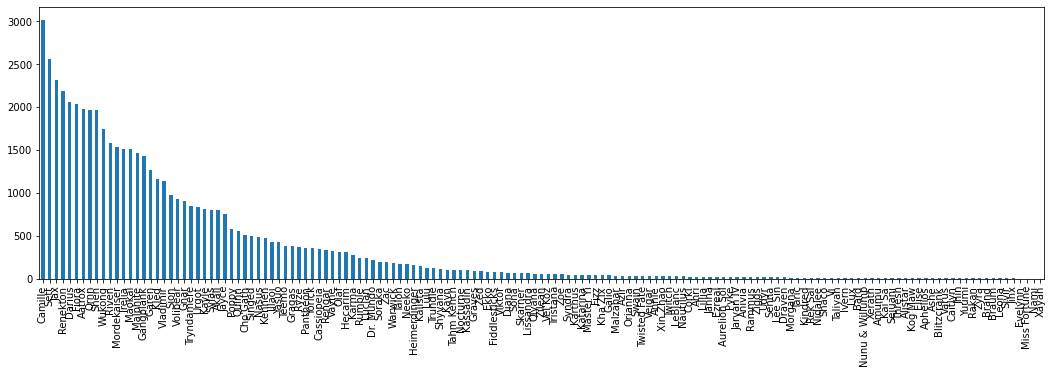

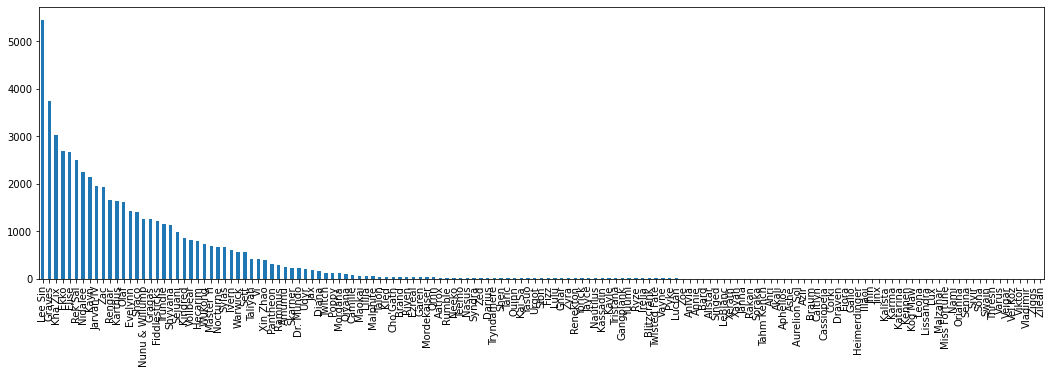

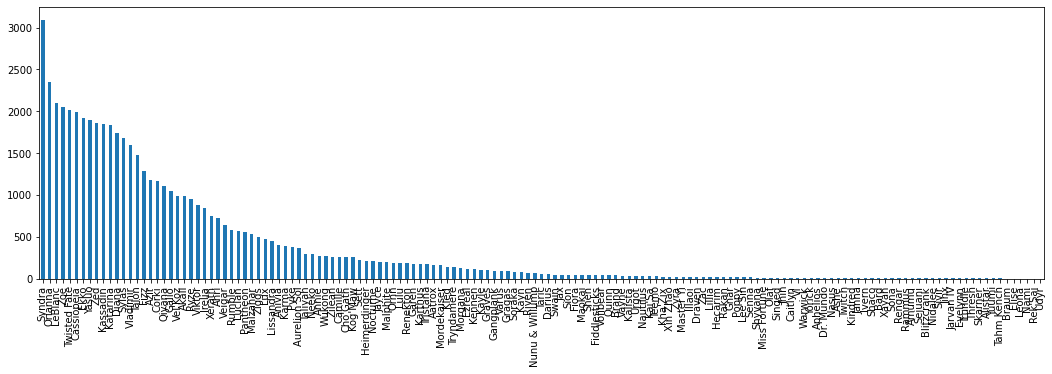

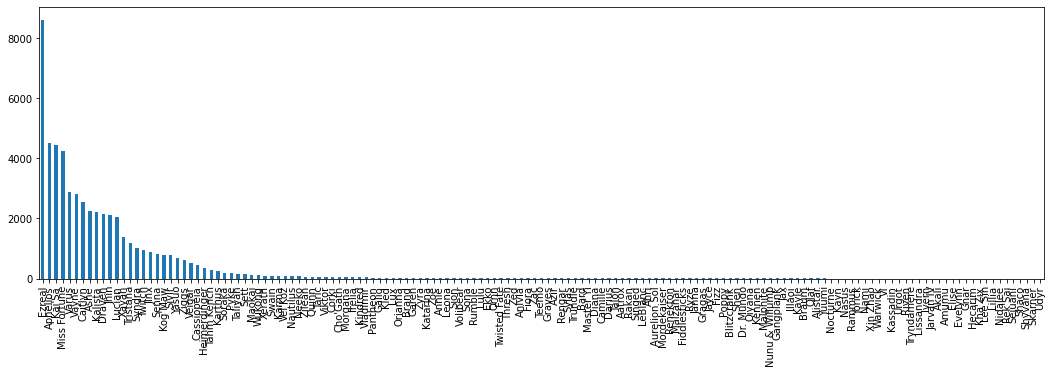

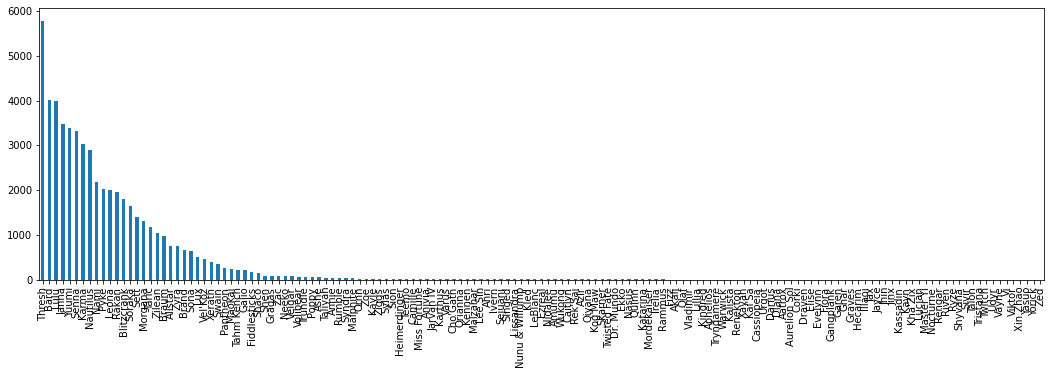

In [27]:
for col in df_champ_counts.columns:
    fig, ax = plt.subplots(figsize=(18,5))    
    df_champ_counts[col].sort_values(ascending=False).plot(ax=ax, kind='bar')

### Chosen champion distributions

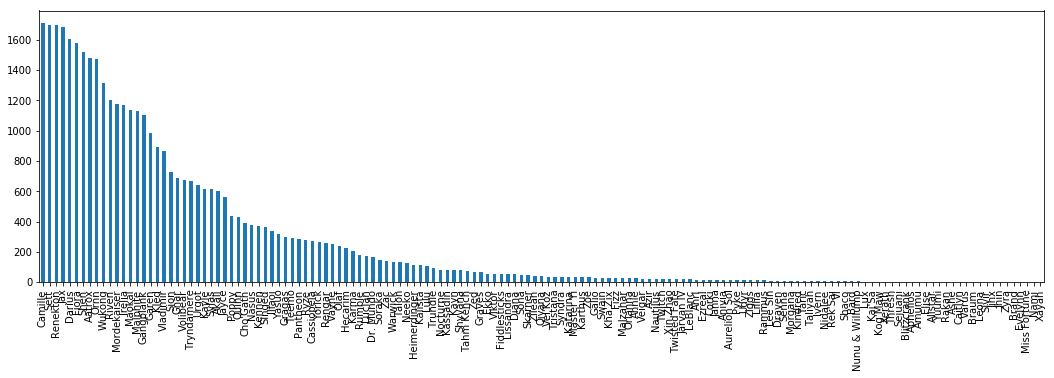

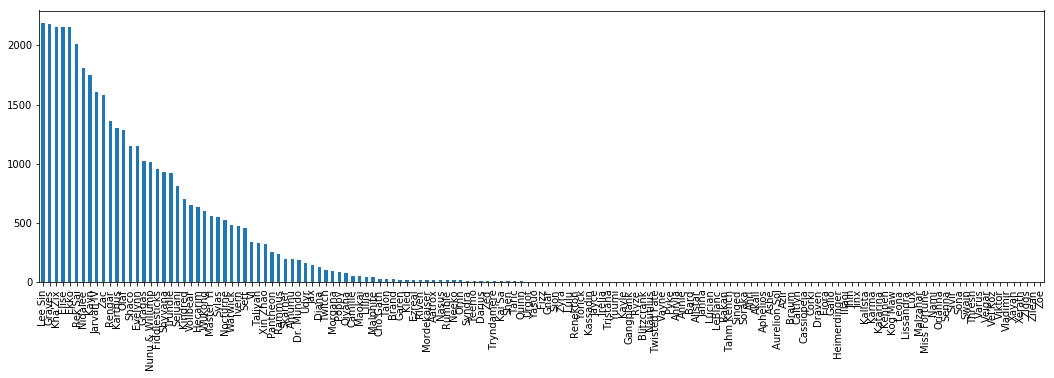

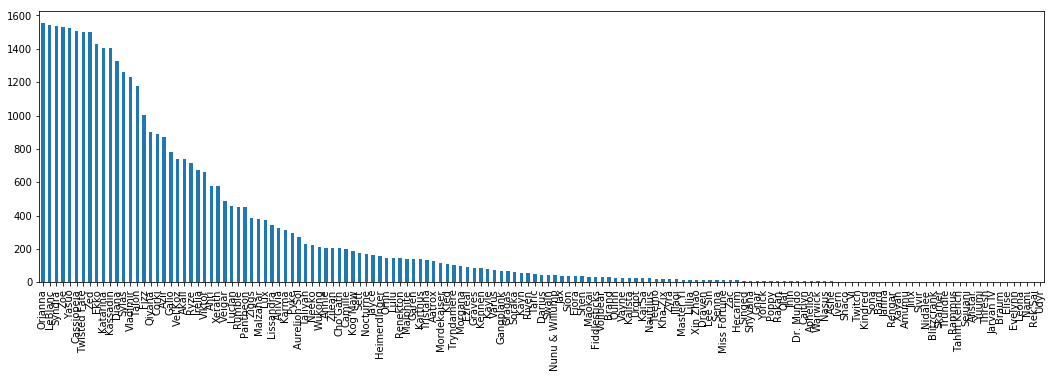

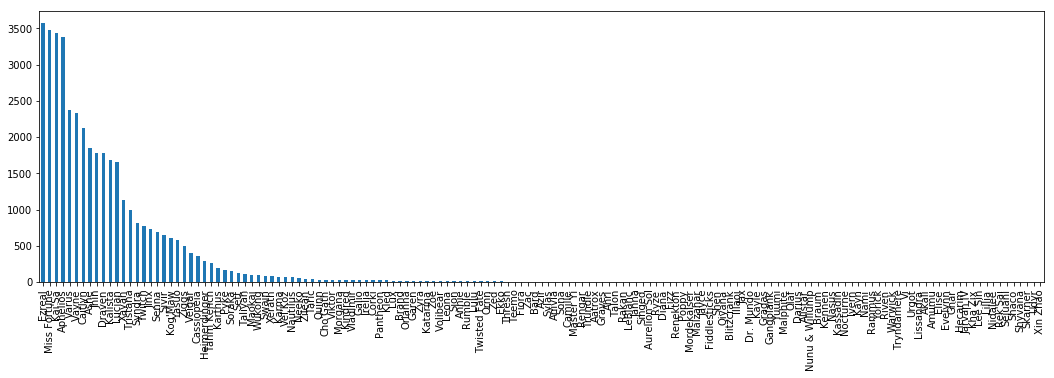

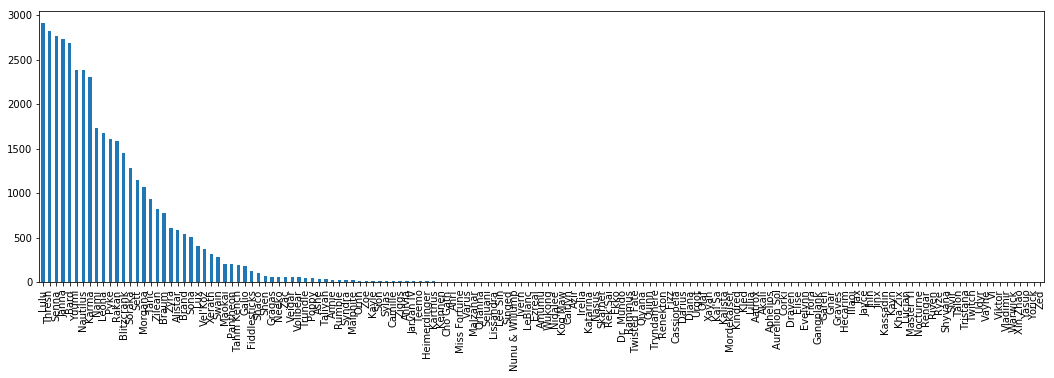

In [85]:
for col in df_champ_counts.columns:
    fig, ax = plt.subplots(figsize=(18,5))    
    df_champ_counts_ds[col].sort_values(ascending=False).plot(ax=ax, kind='bar')

In [88]:
champion_index = list(pd.read_csv('processed_data/chamion_index.csv', index_col=0).values.flatten())

champion_dict = {y:i for i,y in enumerate(champion_index)}

df = pd.read_csv('processed_data/clash_df.csv')

df.champions = df.champions.apply(lambda x: ast.literal_eval(x))

df['champion_ids'] = df.champions.apply(lambda x: [champion_dict[y] for y in x])

df = df.drop_duplicates(subset=['team', 'id', 'win']).copy()

In [90]:
df_champ_expanded = pd.DataFrame.from_records(df.champions.values, columns=['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'SUPPORT'])

df_champ_counts = df_champ_expanded.apply(lambda x :x.value_counts())

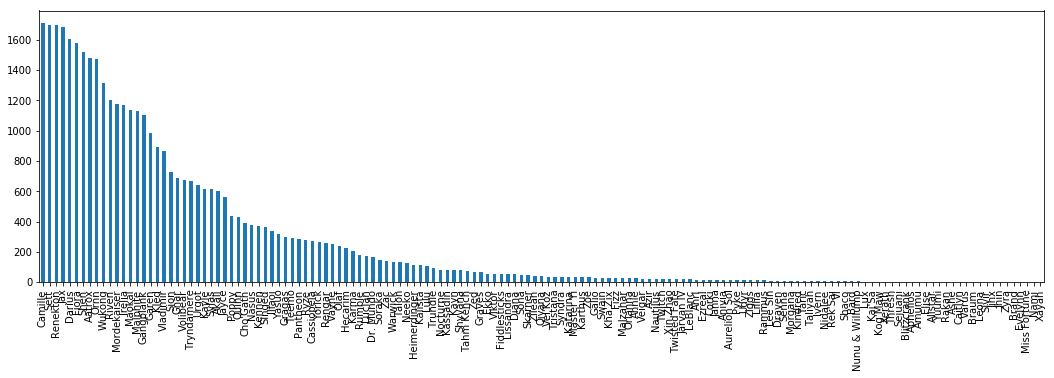

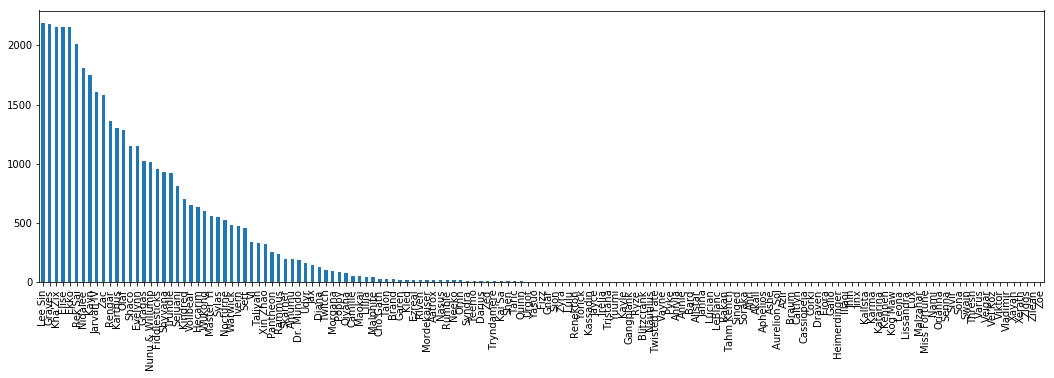

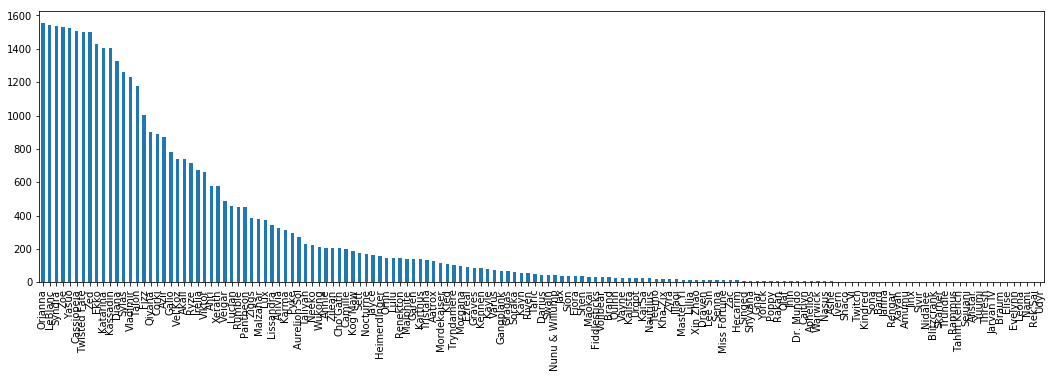

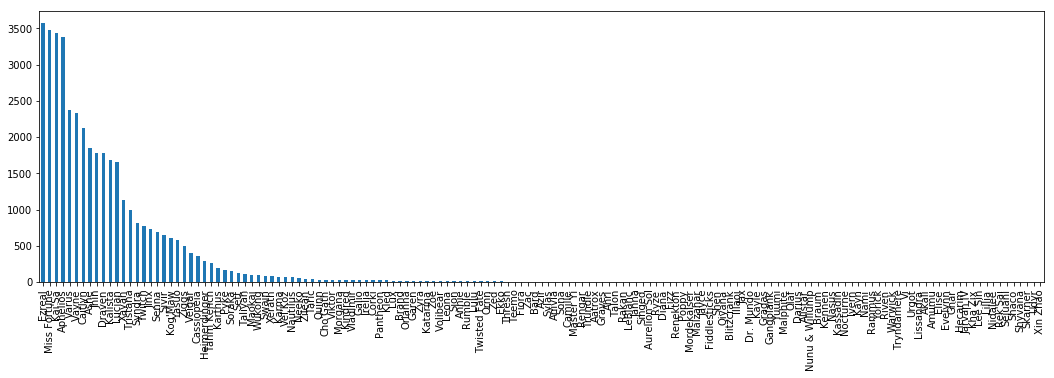

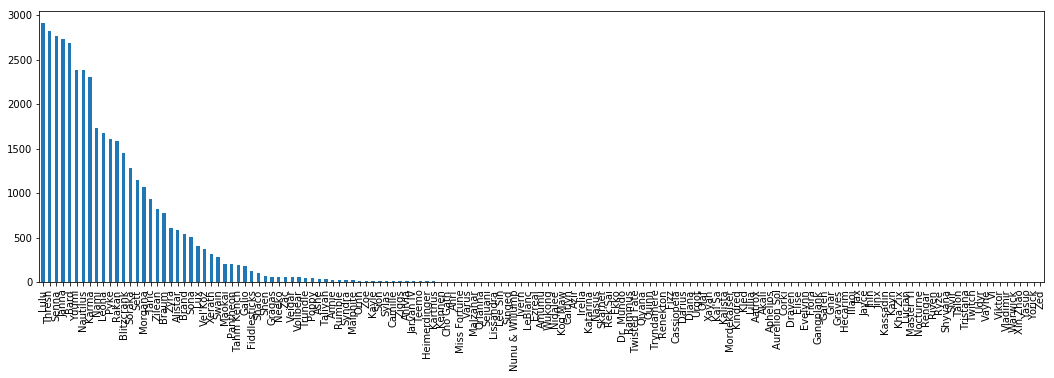

In [91]:
for col in df_champ_counts.columns:
    fig, ax = plt.subplots(figsize=(18,5))    
    df_champ_counts_ds[col].sort_values(ascending=False).plot(ax=ax, kind='bar')